# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
#loading both data files into DateFrames
pjts = pd.read_json('data/world_bank_projects.json')

# Question 1: Find the 10 countries with most projects
Using the inspection of the data sample provided I extract all the columns that are related to the country of the project, and then verify that the data in the columns are clean and consistent.

In [9]:
# Extracting all the data relating to country for each projects
country_columns=['country_namecode', 'countrycode', 'countryname', 'countryshortname']

# Getting complete list of unique combinations of entries in the 4 country columns
u_cntry_cols = pjts[country_columns].drop_duplicates().reset_index(drop=True)

# Confirming that all 'country_namecode' columns are made up from the 'countryname' and 'countrycode' columns
assert u_cntry_cols['country_namecode'].equals(u_cntry_cols.countryname + '!$!' + u_cntry_cols.countrycode)

# Printing for manual validation any row where the countryshortname isn't contained in the countryname
mask = u_cntry_cols.apply(lambda x: x['countryshortname'] not in x['countryname'], axis=1)
u_cntry_cols[mask]

,country_namecode,countrycode,countryname,countryshortname
3,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of"
33,Argentine Republic!$!AR,AR,Argentine Republic,Argentina
34,Republic of The Gambia!$!GM,GM,Republic of The Gambia,"Gambia, The"
36,Republic of Congo!$!CG,CG,Republic of Congo,"Congo, Republic of"
37,Democratic Republic of Sao Tome and Prin!$!ST,ST,Democratic Republic of Sao Tome and Prin,Sao Tome and Principe
50,Lebanese Republic!$!LB,LB,Lebanese Republic,Lebanon
61,Arab Republic of Egypt!$!EG,EG,Arab Republic of Egypt,"Egypt, Arab Republic of"
74,Democratic Republic of the Congo!$!ZR,ZR,Democratic Republic of the Congo,"Congo, Democratic Republic of"
100,The Independent State of Papua New Guine!$!PG,PG,The Independent State of Papua New Guine,Papua New Guinea
101,Democratic Socialist Republic of Sri Lan!$!LK,LK,Democratic Socialist Republic of Sri Lan,Sri Lanka


All 'country_namecode' entries are of the same format containing the 'countrycode' and 'countryname'. Also there are 11 countrys where the 'countryshortname' is not included in the 'countryname', from manual inspection of this list you can see all entries are correct.

In [10]:
# Extracting the clean data
pjts_country = pjts[['_id']+ country_columns]
# Grouping, sorting and showing the top 10 entries.
pjts_country.groupby(country_columns).count().sort_values('_id', ascending=False).head(10)


,,,,_id
country_namecode,countrycode,countryname,countryshortname,
People's Republic of China!$!CN,CN,People's Republic of China,China,19
Republic of Indonesia!$!ID,ID,Republic of Indonesia,Indonesia,19
Socialist Republic of Vietnam!$!VN,VN,Socialist Republic of Vietnam,Vietnam,17
Republic of India!$!IN,IN,Republic of India,India,16
Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",13
People's Republic of Bangladesh!$!BD,BD,People's Republic of Bangladesh,Bangladesh,12
Nepal!$!NP,NP,Nepal,Nepal,12
Kingdom of Morocco!$!MA,MA,Kingdom of Morocco,Morocco,12
Republic of Mozambique!$!MZ,MZ,Republic of Mozambique,Mozambique,11


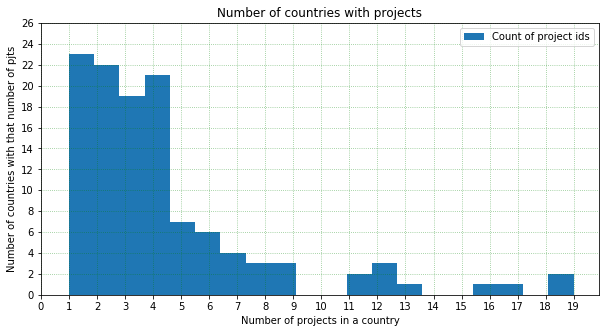

,id
countryshortname,
Afghanistan,6
Africa,11
Albania,4
Angola,1
Antigua and Barbuda,1
Argentina,2
Armenia,8
Azerbaijan,4
Bangladesh,12


In [25]:
# visualizing distribution of projects in countries
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

plotdf = pjts[['countryshortname', '_id']].groupby('countryshortname').count()
plotdf = plotdf.rename(columns={'_id':'id'})
plotdf.plot(kind='hist', bins=20 )
plt.title('Number of countries with projects')
plt.xlabel('Number of projects in a country')
plt.ylabel('Number of countries with that number of pjts')
plt.xticks(range(20))
plt.yticks(range(0, 28, 2))
plt.grid(color='g', alpha=0.5, linestyle=':')
plt.legend(['Count of project ids'])
plt.show()
plotdf

# Question 2: Find the top 10 major project themes 
(using column 'mjtheme_namecode')

In [12]:
# Getting the data method 1 processing the relevant column manually
# Extracting the desired column from the DataFrame
mjtheme = pjts['mjtheme_namecode']
# processing each multi project element for themes
pjt_theme_list = []
[pjt_theme_list.extend(r) for r in mjtheme]
# converting back to dataframe
pjt_theme_1 = pd.DataFrame(pjt_theme_list)

In [13]:
# Getting the data method 2 using json_normalize
json_string = json.load((open('data/world_bank_projects.json')))
# using json_normalize to get the project information directly
pjt_theme_2 = json_normalize(json_string, 'mjtheme_namecode')
# viewing the data
pjt_theme_2.head(3)

,code,name
0,8,Human development
1,11,
2,1,Economic management


In [14]:
# confirming both methods of accessing the json are equivalent
assert pjt_theme_1.equals(pjt_theme_2)
# rename working dataframe
df = pjt_theme_2

Below are the initial commands I used to understand the data:

In [15]:
# Project theme code 11 is most common pjt theme code
df['code'].value_counts().head(10)
# These are the 10 most common project theme codes: 

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
Name: code, dtype: int64

In [16]:
# Show the project names and counts which combinations exsist:
df.groupby(['code', 'name']).size().reset_index().rename(columns={0:'count'})
# There are missing names, but no codes with incorrect names.

,code,name,count
0,1,,5
1,1,Economic management,33
2,10,,14
3,10,Rural development,202
4,11,,27
5,11,Environment and natural resources management,223
6,2,,15
7,2,Public sector governance,184
8,3,,3
9,3,Rule of law,12


Presenting the project theme names, codes and totals (code only vs code and named) in one table:

In [29]:
# add column indicating if project theme is named or just coded
df['named'] = df.name.map(lambda x: 'named' if x != '' else 'code only')

# pivoting data to create table showing the number project themes 'named' and 'code only'.
counted = df.reset_index().pivot_table(index=['code'], columns='named', values='index', aggfunc='count')
counted['totals'] = counted.sum(axis='columns')

# Creating a lookup table which names go with which codes
cn_lookup = df.loc[df.name.map(lambda x: x != ''),['code', 'name']].drop_duplicates()
# adding combined project theme name code column
cn_lookup['combo'] = cn_lookup[['name', 'code']].apply(lambda x: '{} (code:{})'.format(x[0], x[1]), axis=1)
# setting lookup table index to 'code'
cn_lookup = cn_lookup.set_index('code')

counted = pd.concat([counted, cn_lookup['combo']], axis=1, sort=False)
# a more complex way of doing the concat above
#counted['combo'] = [cn_lookup.loc[v]['combo'] for v in counted.reset_index()['code'].values]

# sorting, ordering columns and printing
counted = counted[['combo', 'code only', 'named', 'totals']].sort_values('totals', ascending=False)
counted.index.name = ''
print('The most common project theme is: {}\nwith {} projects.'.format(counted.combo[0],counted['totals'][0]))
print('Here are the rest of the project themes in decending order.\nThere are a total of 11 different themes')
counted
                                  

The most common project theme is: Environment and natural resources management (code:11)
with 250 projects.
Here are the rest of the project themes in decending order.
There are a total of 11 different themes


,combo,code only,named,totals
,,,,
11,Environment and natural resources management (...,27,223,250
10,Rural development (code:10),14,202,216
8,Human development (code:8),13,197,210
2,Public sector governance (code:2),15,184,199
6,Social protection and risk management (code:6),10,158,168
4,Financial and private sector development (code:4),16,130,146
7,Social dev/gender/inclusion (code:7),11,119,130
5,Trade and integration (code:5),5,72,77
9,Urban development (code:9),3,47,50


## Question 3: Create a dataframe with the missing names filled in.

In [18]:
# function for adding the project theme name to the row if its missing
def correct_pjt_theme(r):
    if r['name'] == '':
        res = r.copy()
        res['name'] = cn_lookup.loc[r.code]['name']
        return res
    else:
        return r

# applying the function to every row in the dataframe
full_data = df[['name', 'code']].apply(correct_pjt_theme, axis=1)
print(full_data.info())
full_data.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
name    1499 non-null object
code    1499 non-null object
dtypes: object(2)
memory usage: 23.5+ KB
None


,name,code
0,Human development,8
1,Environment and natural resources management,11
2,Economic management,1
3,Social protection and risk management,6
4,Trade and integration,5
5,Public sector governance,2
6,Environment and natural resources management,11
7,Social protection and risk management,6
8,Social dev/gender/inclusion,7
9,Social dev/gender/inclusion,7


In [19]:
# Solution 2 - dropping all names and recreating the entire column
df2 = df[['code']]
full_data2 = pd.merge(df2, cn_lookup.reset_index()[['name','code']], on='code', how='left')
print(full_data2.info())
full_data.head(10)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1499 entries, 0 to 1498
Data columns (total 2 columns):
code    1499 non-null object
name    1499 non-null object
dtypes: object(2)
memory usage: 35.1+ KB
None


,name,code
0,Human development,8
1,Environment and natural resources management,11
2,Economic management,1
3,Social protection and risk management,6
4,Trade and integration,5
5,Public sector governance,2
6,Environment and natural resources management,11
7,Social protection and risk management,6
8,Social dev/gender/inclusion,7
9,Social dev/gender/inclusion,7


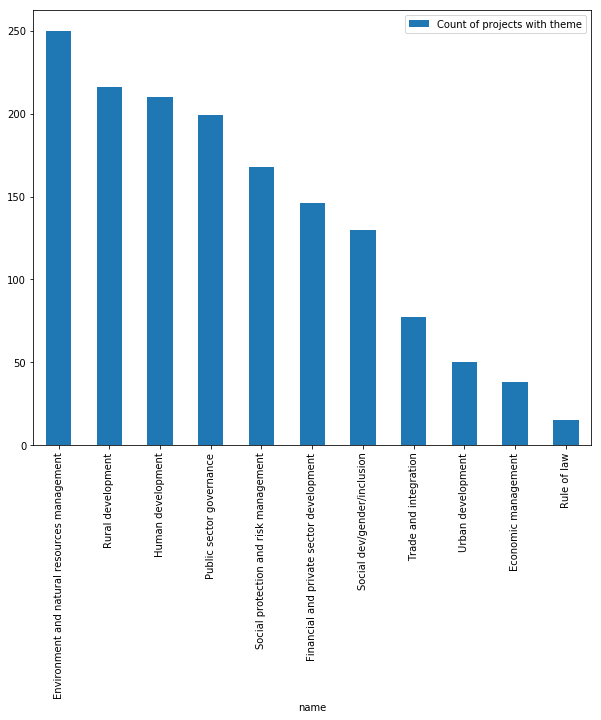

In [20]:
# visualizing project theme breakdown
plt.rcParams["figure.figsize"] = (10,8)
plotdf = full_data.groupby('name').count().sort_values('code', ascending=False)
plotdf.plot(kind='bar')
plt.legend(['Count of projects with theme'])
plt.show()

Various code snippets:

creates df of just the projects that are missing names<br>
`missing = df.loc[df.name.map(lambda x: x == ''), ['code','name']]`

creates the grouped object counting projects <br>
`gr = pjt_theme_2.groupby(['code', 'name']).size()`